# eMed flood Stage 2 : Added background potential energy (BPE) by inflow

## </span>(Until the eMed level reaches Sicily sill level)</span>


Same concept is applied here, as in wMed stage 1.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math

## Upload data files here

Rise of the basin levels exported from Zanclean flooding model is used to calculate the daily addition of BPE by flood discharge.

In [7]:
SL_eMedarray    = np.loadtxt(fname="SLrise_eMed.txt")                  # Daily rise of sea-level in eMed during stage 2
SLrise_eMed     = SL_eMedarray.tolist()
rho_inflow      = np.loadtxt(fname="wMed_outflow_density.txt")         # Daily inflow water density to eMed
Hypsometry_eMed = np.loadtxt(fname="Hypsometry_eMed_evolution.txt")    # Reconstructed eMed hypsometry

##  Setting parameters

In [8]:
g = 9.81  # Acceleration due to gravity [m s^-2]
SLarray =(Hypsometry_eMed[:,0])      # Text file column 1 gives basin depth
Area =(Hypsometry_eMed[:,1])*10**12  # Text file column 2 gives area with depth

## Calculation

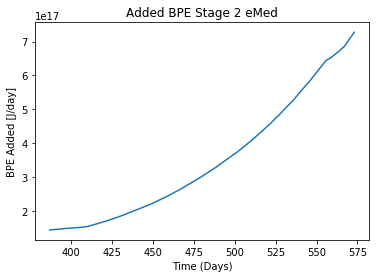

In [9]:
SL1  = SLrise_eMed[0]  # Present-day sea-level
SL2  = SLrise_eMed[1]  # Next day sea-level

BPE_sum = [0]  # Array to store total BPE for plotting
t = 387       # Starting time stage 2
time=[]       # Array to store time [days]

while SL1>0:
    Rho_in = rho_inflow[t-386]  # Daily inflow density
    
    SL1=SLrise_eMed[SLrise_eMed.index(SL1)+1]
    if SL1 == SLrise_eMed[-1]:
        break
      
    SL2=SLrise_eMed[SLrise_eMed.index(SL2)+1]

    # Arrays used for calculations, see below
    y   = []
    y0  = []
    yi  = []
    p   = []
    y00 = []
    yii = []
    Product_VolumeHt = []  # product of cell volume and head difference
    
    SLEarly  = math.trunc(SL1)
    SLLate   = math.trunc(SL2)+1
    SLLate2  = math.trunc(SL2)
    SLGap1   = SL1-SLEarly
    SLGap2   = SLLate-SL2
    
    #print (SLEarly,SLLate,SLLate2, SLGap1, SLGap2)
    
    for i,j in zip(SLarray,Area):
        
        if i<SL1 and i>SL2:
            
            y.append(i)
            p.append(j)
            #print (j)
            
            for ii,jj in zip(y,p):
                
                product = (SL1-ii+0.5)*jj  
                
            Product_VolumeHt.append(product) 
            
    BPE_completeCells = np.sum(Product_VolumeHt)*g*Rho_in
    
    for i0,j0 in zip(SLarray,Area):
        
        if i0 == (SLEarly+1):
            
            y0.append(i0)
            y00.append(j0)
         
        #CASE 1
        BPEBot_case1 = np.array(y00)*Rho_in*0.5*g*(SLGap1)**2
        # CASE 2 where SLLate = SLEarly
        BPEBot_case2 = np.array(y00)*Rho_in*0.5*g*((SLGap1)**2)
        
    for ii,ji in zip(SLarray,Area):
        
        if ii == SLLate:
            
            yi.append(ii)
            yii.append(ji)
         
        #Case1
        BPETop_case1 = np.array(yii)*Rho_in*g*0.5*((2*(SL1-SL2)*(SL2-SLLate2))+(SL2-SLLate2)**2)
        #Case2 
        BPETop_case2 = np.array(yii)*Rho_in*g*0.5*((2*SLGap1*SLGap2)+SLGap2**2)
        

    if SLEarly-SLLate2>1:    # CASE 1 (Sealevel rise across several layers)
        BPETotal = BPE_completeCells + BPEBot_case1 - BPETop_case1  
        
    if SLEarly-SLLate2 ==1:  # CASE 2 (Sealevel rise across 2 consecutive layers)
        BPETotal = BPEBot_case2 + BPETop_case2
        
    if SLEarly==SLLate2:     # CASE 3 (Sealevel rise within a layer of 1 m)
        BPETotal = ((1-SLGap1-SLGap2)**2)*Rho_in*g*0.5*np.array(yii) #- Sign doen's matter as squared is positive
        
    BPE_sum.append(BPETotal)
    time.append(t)
    t=t+1
    #print(y00, SLGap1, BPETop1, SLGap2, SLEarly, SLLate, BPETop_case1)
    #print(yii)
    #print(y)
    #print(p)
    #print(Product_VolumeHt)
    
    #print(BPE_sum)

    
plt.figure()
plt.title('Added BPE Stage 2 eMed')
plt.ylabel('BPE Added [J/day]')
plt.xlabel('Time (Days)')
plt.plot(time,BPE_sum[1:])

np.savetxt("eMed_added_BPE.txt", np.array(BPE_sum), fmt="%s")
    